In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data is collected from images to get numeric data industrial data is used 
# wavelet trnsform too is used to extract features from images

In [3]:
data = pd.read_csv('data_banknote_authentication.txt', header=None)
data.columns = ['variance', 'skewness', 'kurtosis', 'entrophy', 'auth']
print(data.head()) # read data 
# in calss feature 0=fake ,1=real note

   variance  skewness  kurtosis  entrophy  auth
0   3.62160    8.6661   -2.8073  -0.44699     0
1   4.54590    8.1674   -2.4586  -1.46210     0
2   3.86600   -2.6383    1.9242   0.10645     0
3   3.45660    9.5228   -4.0112  -3.59440     0
4   0.32924   -4.4552    4.5718  -0.98880     0


In [4]:
print(data.info()) # any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entrophy  1372 non-null   float64
 4   auth      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


### exploratory data analysis--looking little more into the data than you are getting from dataset¶

In [5]:
# 1.multi variate analysis- we are looking into the relationship b/w features
#2.univariate -only 1 fature understanding

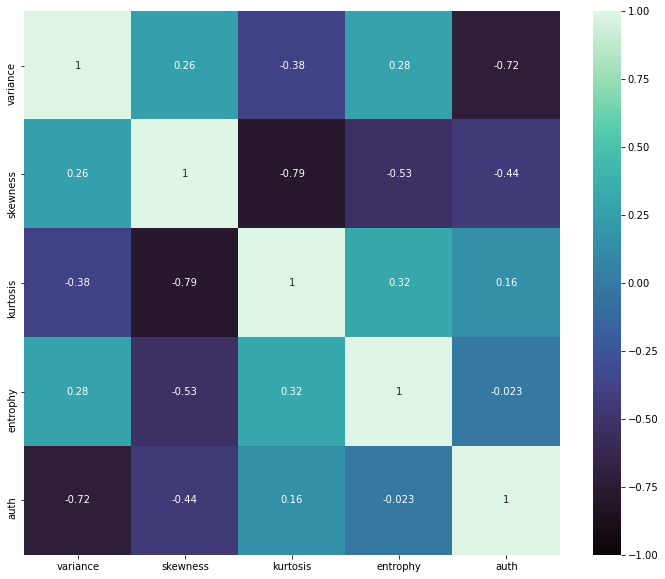

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,vmin=-1.0, cmap="mako")
plt.show()# correlation matrix

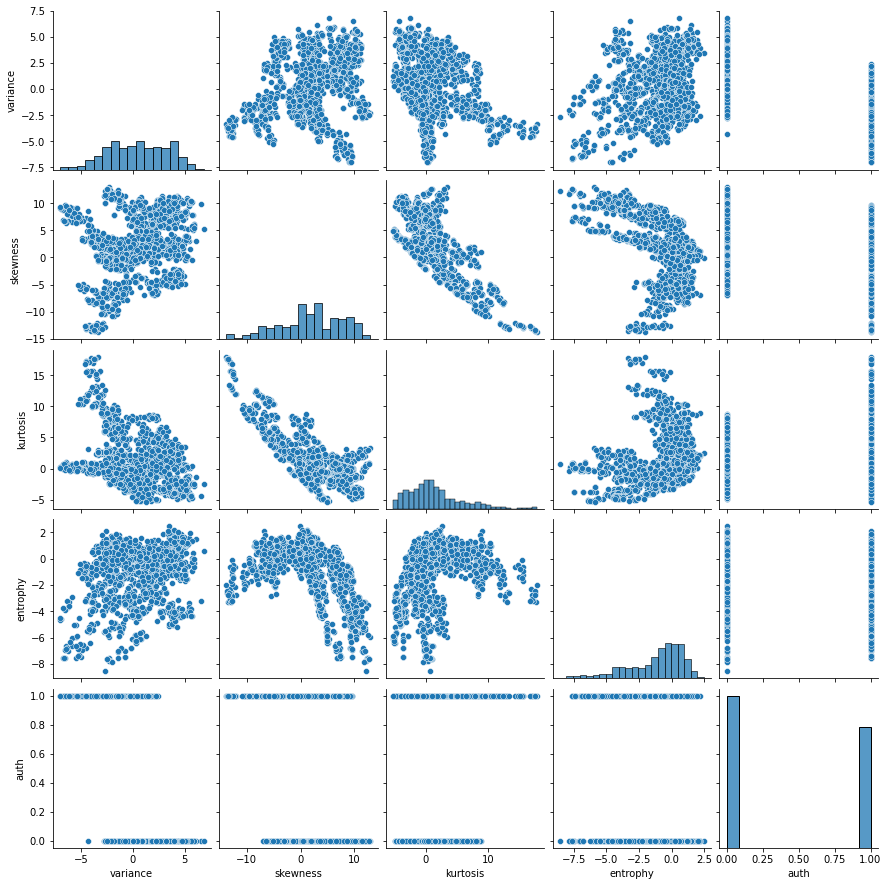

In [7]:
sns.pairplot(data)
plt.show()

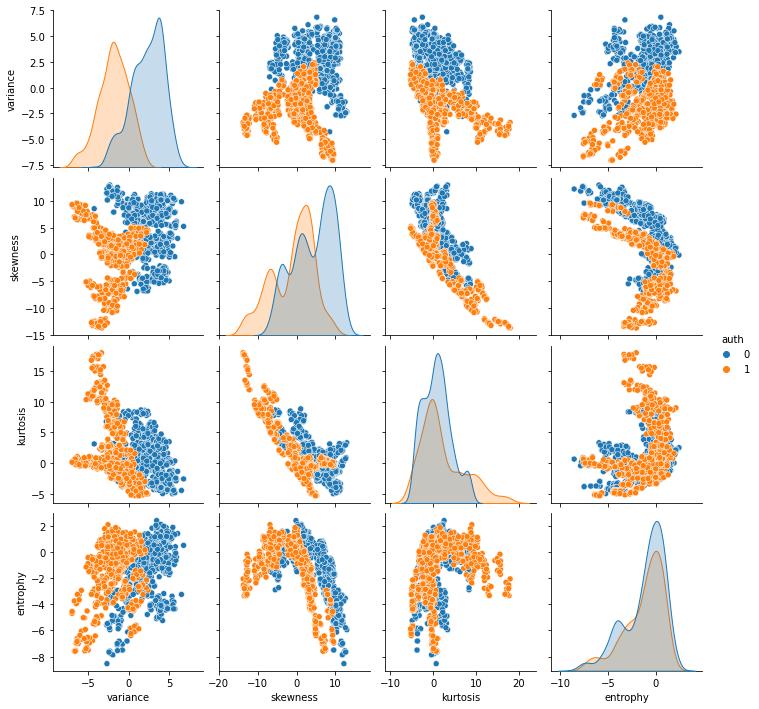

In [8]:
sns.pairplot(data,hue="auth")
plt.show()

In [9]:
#univariate-distribution blot

In [10]:
y1=data["auth"].copy()
x1=data.drop("auth",axis=1).copy()

C:\Users\pushpa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pushpa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pushpa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

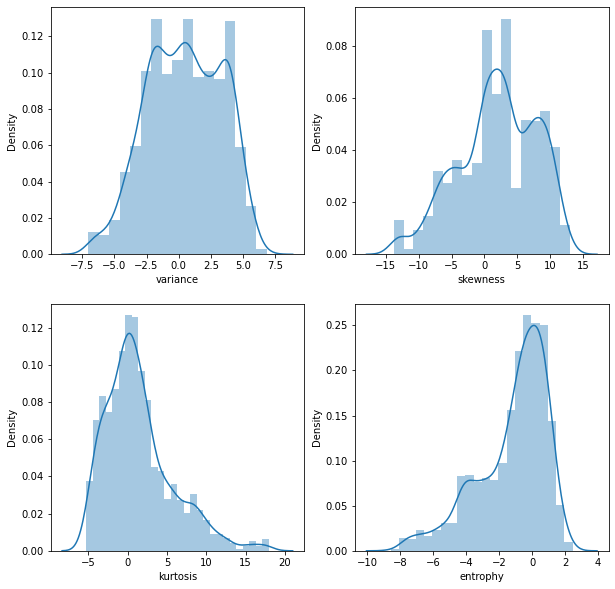

In [11]:
plt.figure(figsize=(10,10))
for i in range(len(x1.columns)):
    plt.subplot(2,2,i+1) #2*2 matrix with index start from 1
    sns.distplot(x1[x1.columns[i]],kde=True)
plt.show()

In [12]:
y1.value_counts()

0    762
1    610
Name: auth, dtype: int64

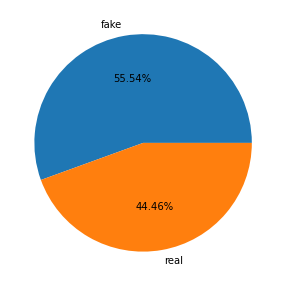

In [13]:
plt.figure(figsize=(5,5))
plt.pie(y1.value_counts(),labels=["fake","real"],autopct="%.2f%%")
plt.show()

# preprocessing 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.7,shuffle=True, random_state=1)

In [16]:
# before standard scaler mean and variance of each columns is differen after standard scaler mean becomes 0 and variance becomes 1

In [17]:
# normalization

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler() # each column mean of zero variance of 1
scalar.fit(x_train)
x_train = pd.DataFrame(scalar.transform(x_train),index=x_train.index,columns=x1.columns)
x_test = pd.DataFrame(scalar.transform(x_test),index=x_test.index,columns=x1.columns)
# it will return numpy array so convert into dataframe
#due to standard scaler we lost indices so used index attribute

In [20]:
x_train

,variance,skewness,kurtosis,entrophy
694,0.105279,-0.279831,0.225994,0.788028
880,-0.998406,-1.188899,1.313246,0.528302
1251,-0.436302,-0.321052,-0.319095,0.388259
812,-0.896365,-0.160137,-0.424637,0.033532
1212,-1.035596,-0.386502,0.031673,0.338288
...,...,...,...,...
715,1.087157,1.153920,-1.052646,0.274743
905,0.106946,0.291501,-1.387911,-1.418754
1096,-1.717542,0.716752,-0.171671,-2.051099
235,0.571424,0.010907,0.220348,0.517197


In [21]:
x_train.mean() 

variance   -3.596660e-17
skewness    2.925900e-17
kurtosis    1.769418e-17
entrophy    8.240659e-17
dtype: float64

In [22]:
x_train.var()

variance    1.001043
skewness    1.001043
kurtosis    1.001043
entrophy    1.001043
dtype: float64

In [23]:
y_train

694     0
880     1
1251    1
812     1
1212    1
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: auth, Length: 960, dtype: int64

# Training

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred=model.predict(x_test)

# Accuracy

In [26]:
from sklearn.metrics import accuracy_score

In [29]:
score1=accuracy_score(y_test,y_pred)

In [30]:
score1

0.9781553398058253

# Result

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print("Test Accuracy: {:.2f}%".format(model.score(x_train,y_train)))

Test Accuracy: 0.98%


In [33]:
y_pred=model.predict(x_test)

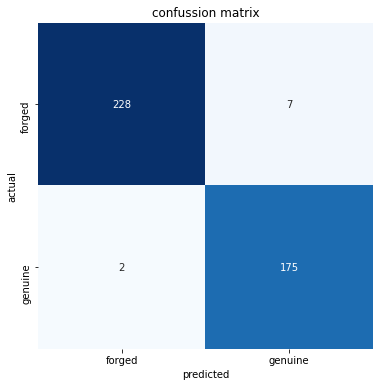

classification report..............
               precision    recall  f1-score   support

      forged       0.99      0.97      0.98       235
     genuine       0.96      0.99      0.97       177

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [34]:
cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=["forged","genuine"])
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt="g",vmin=0,cmap="Blues", cbar=False)
plt.xticks(np.arange(2)+0.5,["forged","genuine"])
plt.yticks(np.arange(2)+0.5,["forged","genuine"])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confussion matrix")
plt.show()
# actual correlation value=annotation =true, vmin=minimum color value
#fmt =formate somtimes confussion matrix return scientific  notations
print("classification report..............\n",clr)

In [35]:
# precision =how accurate in terms of false pasitive  high
# recall how accurate in terms of false negative high
#accuracy: This is a measure of all correctly identified cases.
#Commonly used when all classes are equally important.
#Accuracy=TP+TF/TP+TNTP+FP+TN+FN
 
#But, when the cost of  FN  is high, accuracy can be misleading.
#This is used when the  TP  and  TN  are more important or can be used when the class distribution is simila

In [36]:
#F1-score=2∗Precision∗Recall/Precision+Recall
#it is used when the  FP  and  FN  are important or when the classes are imbalanced.

In [37]:
#Support is the number of actual occurrences of the class in the specified dataset.

# Making Prediction on a Single Bank Note

In [38]:
#Let’s print the feature values for the 50th banknote in the dataset.
data.loc[50]

variance    4.3239
skewness   -4.8835
kurtosis    3.4356
entrophy   -0.5776
auth        0.0000
Name: 50, dtype: float64

In [39]:
single_record = scalar.transform (x1.values[50].reshape(1, -1))

In [40]:
#making predictions on the single record
fake_note = model.predict(single_record)
print(fake_note)

[0]
